In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
# set data pathway
data_folder = '/Users/tobybalfre/Documents/Capgemini/Accounts/Rugby 7s/Rugby Data/_6_data_clean'

# set head to head filename
head_filename = 'all_time_head_to_head.csv'

In [3]:
teamhead = pd.read_csv(data_folder + '/' + head_filename)

## Head To Head Pairwise Analysis 

In [4]:
# look at tournament ranking by value then by consistency.

In [5]:
teamhead.columns

Index(['Unnamed: 0', 'drawn', 'played', 'team1conversions', 'team1dropgoals',
       'team1penalties', 'team1points', 'team1tries', 'team1won',
       'team2conversions', 'team2dropgoals', 'team2penalties', 'team2points',
       'team2tries', 'team2won', 'tournament_id', 'team1id', 'team2id'],
      dtype='object')

### Agression Ranking 

based on number of tries scored.
firstly extract team1 mean and s.d. then team 2, combine to then rank.

In [16]:
# get mean and standard deviation for try scores by each team for each tournament.
agression = teamhead.groupby(['tournament_id', 'team1id'])['team1tries'].agg(['mean','std']).reset_index()

In [17]:
# now get ranking for each team in each tournament.
#s['Rank'] = s.groupby(['Year'])['Return'].rank(ascending=False)

agression['mean_rank'] = agression.groupby(['tournament_id'])['mean'].rank(ascending=False)

In [18]:
agression['std_rank'] = agression.groupby(['tournament_id'])['std'].rank(ascending=False)

In [19]:
agression.head(20)

,tournament_id,team1id,mean,std,mean_rank,std_rank
0,1611,2408,3.000000,1.414214,11.0,5.0
1,1611,2409,3.000000,0.000000,11.0,13.0
2,1611,2410,5.500000,2.645751,1.5,1.0
3,1611,2412,4.000000,NaN,5.5,NaN
4,1611,2414,2.333333,1.154701,13.0,7.5
5,1611,2415,2.250000,0.500000,14.0,12.0
6,1611,2416,3.000000,NaN,11.0,NaN
7,1611,2418,3.750000,1.258306,7.0,6.0
8,1611,2419,3.333333,1.154701,9.0,7.5
9,1611,2420,1.500000,0.707107,15.0,10.0


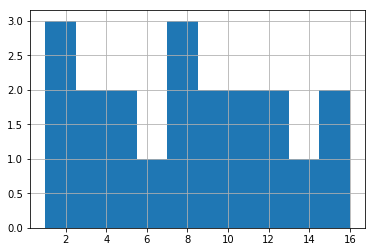

In [20]:
agression[agression['team1id']==2409]['mean_rank'].hist()

###  Defence Ranking
'team1dropgoals'

In [24]:
dropped = teamhead.groupby(['tournament_id', 'team1id'])['team1dropgoals'].agg(['mean','std']).reset_index()
dropped['mean_rank'] = dropped.groupby(['tournament_id'])['mean'].rank(ascending=False)
dropped['std_rank'] = dropped.groupby(['tournament_id'])['std'].rank(ascending=False)

#  Conversions
'team1conversions'

In [29]:
conversions = teamhead.groupby(['tournament_id', 'team1id'])['team1conversions'].agg(['mean','std']).reset_index()
conversions['mean_rank'] = conversions.groupby(['tournament_id'])['mean'].rank(ascending=False)
conversions['std_rank'] = conversions.groupby(['tournament_id'])['std'].rank(ascending=False)

## Top teams comparison
New Zealand
South Africa
Fiji
England
Argentina


In [25]:
#2412 - England 7s
#2416 - New Zealand 7s
#2420 - South Africa 7s
#2413 - Fiji 7s
#2408 - Argentina 7s
# look at ranking variation of top teams across all tournaments
topteams = [2412, 2416, 2420, 2413, 2408]

### Agression 

In [21]:

# filter data by only top teams being team1 (need to look at when they are team 2 later)
agression_top = agression.loc[agression['team1id'].isin(topteams)]

In [22]:
agression_top.groupby(['team1id'])['mean_rank'].agg(['mean','std']).reset_index()

,team1id,mean,std
0,2408,9.525000,3.130810
1,2412,10.194444,4.854164
2,2413,9.785714,3.901254
3,2416,11.588235,5.229828
4,2420,11.558824,3.732804


### Defence (DropGoals) 

In [31]:
dropped_top = dropped.loc[agression['team1id'].isin(topteams)]
dropped_top.groupby(['team1id'])['mean_rank'].agg(['mean','std']).reset_index()

,team1id,mean,std
0,2408,8.125000,0.319333
1,2412,8.166667,0.297044
2,2413,8.214286,0.323103
3,2416,8.205882,0.253650
4,2420,8.147059,0.342997


###  Conversions
'team1conversions'

In [30]:
conversions_top = conversions.loc[agression['team1id'].isin(topteams)]
conversions_top.groupby(['team1id'])['mean_rank'].agg(['mean','std']).reset_index()

,team1id,mean,std
0,2408,9.125000,4.385607
1,2412,10.916667,3.971405
2,2413,9.571429,4.108421
3,2416,10.323529,5.195976
4,2420,11.058824,4.190325
